In [87]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [88]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [89]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [90]:
rf.feature_importances_

array([0.0440381 , 0.00081076, 0.00692806, 0.00080579, 0.02889161,
       0.27633237, 0.01799996, 0.05401225, 0.0033757 , 0.01904755,
       0.0096297 , 0.01368687, 0.52444129])

In [91]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


<BarContainer object of 13 artists>

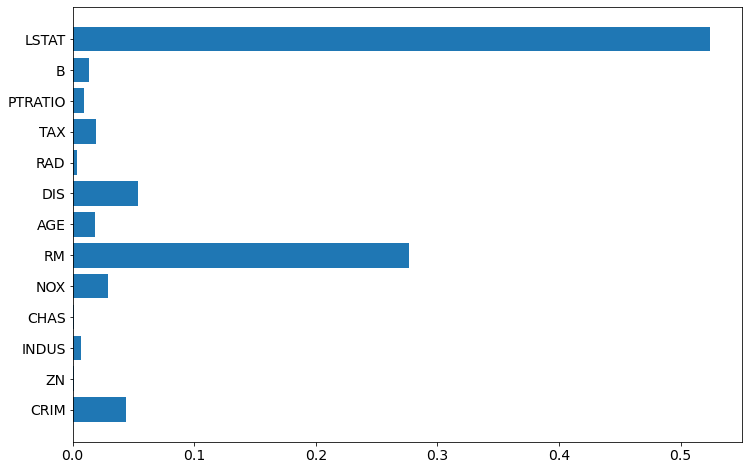

In [92]:
plt.barh(boston.feature_names, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

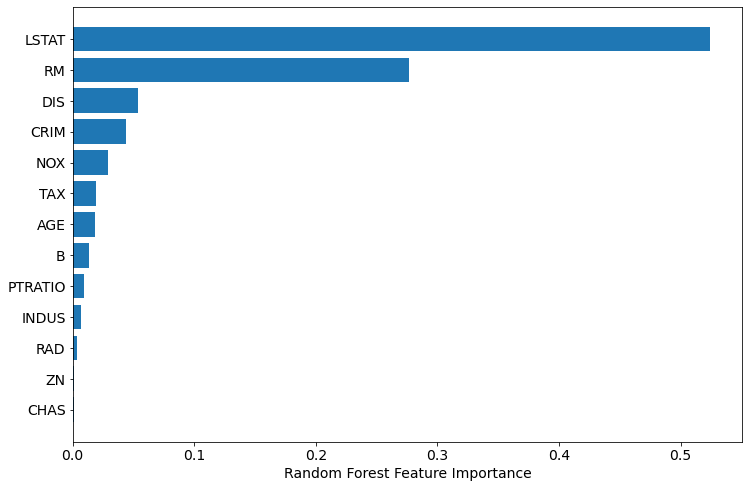

In [93]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(boston.feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [94]:
# permutation importance:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

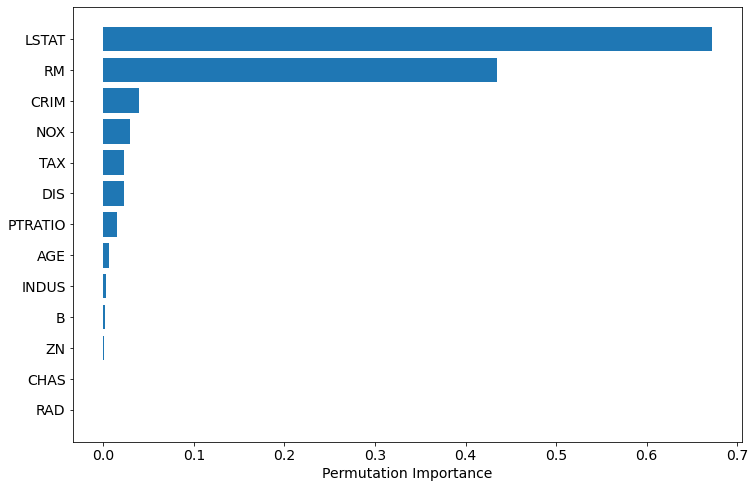

In [95]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(boston.feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [96]:
# SHAP feature importance:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

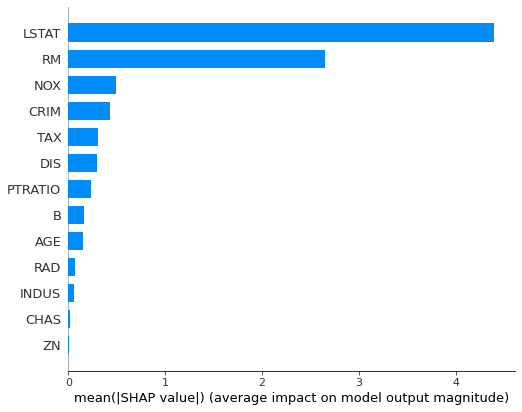

In [97]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

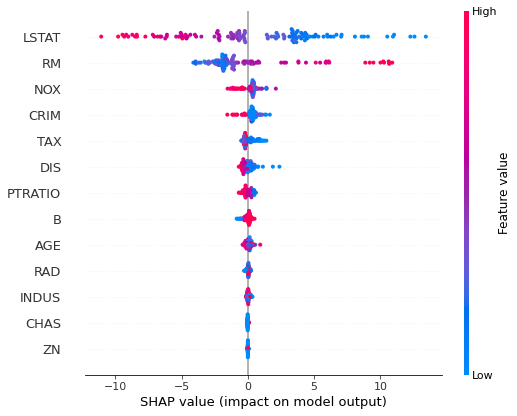

In [98]:
shap.summary_plot(shap_values, X_test)

# USE MY OWN DATA:

In [99]:
CARIACO = pd.read_csv("../DATA/January/Combined_CARIACO_data_v6.csv")

CARIACO.columns.values

array(['Unnamed: 0', 'cdww', 'iews', 'inss', 'mcc', 'mwp', 'si10', 'sp',
       'sst', 't2m', 'tauoc', 'u10', 'ust', 'v10', 'v10n', 'vst', 'wind',
       'time_month', 'cdir', 'e', 'ewss', 'i10fg', 'lsp', 'magss', 'mer',
       'metss', 'mmtss', 'mntss', 'mtpr', 'nsss', 'sshf', 'tp', 'NO3_UDO',
       'PO4_UDO', 'SiO4_UDO', 'NH4_USF', 'NO2_USF', 'NO3_NO2_USF',
       'PO4_USF', 'SiO4_USF', 'pH_corrected', 'Salinity_bottles',
       'Temperature', 'Sigma_t', 'PrimaryProductivity', 'Chlorophyll',
       'Phaeopigments', 'NO3_USF', 'NO3_UDO_35m', 'PO4_UDO_35m',
       'SiO4_UDO_35m', 'NH4_USF_35m', 'NO2_USF_35m', 'NO3_NO2_USF_35m',
       'PO4_USF_35m', 'SiO4_USF_35m', 'pH_corrected_35m',
       'Salinity_bottles_35m', 'Temperature_35m', 'Sigma_t_35m',
       'PrimaryProductivity_35m', 'Chlorophyll_35m', 'Phaeopigments_35m',
       'NO3_USF_35m', 'NO3_UDO_35to100m', 'PO4_UDO_35to100m',
       'SiO4_UDO_35to100m', 'NH4_USF_35to100m', 'NO2_USF_35to100m',
       'NO3_NO2_USF_35to100m', 'PO4_

In [204]:
CARIACO_SUB1 = CARIACO[['u10',
         'sst',
         'mtpr',
         'cdir',
         'e',
            'NO3_NO2_USF_35m',
            'PO4_USF_35m',
            'SiO4_USF_35m',
             
                        'pH_corrected', #'Isotherm_21',
                        
         'Chlorophyll_35m', 
        ]].dropna()

In [205]:
X = CARIACO_SUB1.drop('Chlorophyll_35m', axis=1)
y = CARIACO_SUB1['Chlorophyll_35m']

In [206]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [207]:
rf = RandomForestRegressor(n_estimators=1000, oob_score=True,)
rf.fit(X_train, y_train)

X does not have valid feature names, but RandomForestRegressor was fitted with feature names


RandomForestRegressor(n_estimators=1000, oob_score=True)

In [208]:
from sklearn.metrics import explained_variance_score
#rf.fit(X_train, y_train)
predicted_testBiom = rf.predict(X_test)

print('oob-error=%.2f, r^2=%.2f, %% Var explained=%.2f' % (
             1. - rf.oob_score_, rf.score(X_test, y_test),
             explained_variance_score(y_test, predicted_testBiom) * 100))

oob-error=0.62, r^2=0.29, % Var explained=29.15


In [209]:
rf.feature_importances_

array([0.09732041, 0.47152308, 0.05207356, 0.07002001, 0.04996487,
       0.06397981, 0.10193277, 0.03346623, 0.05971926])

<BarContainer object of 9 artists>

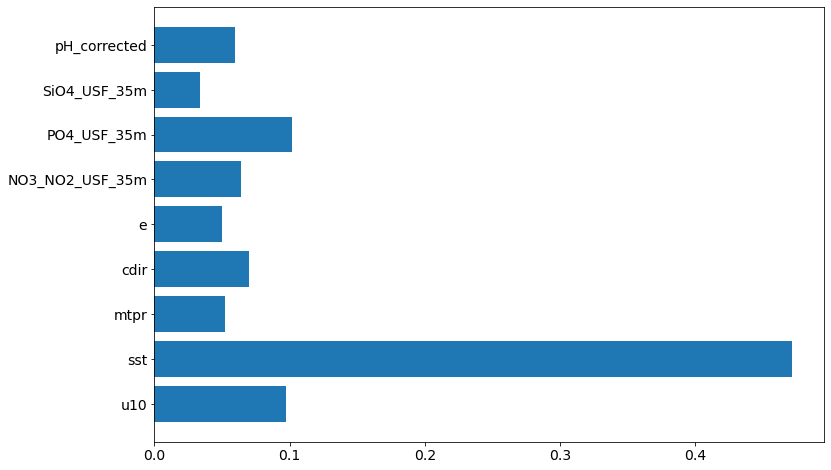

In [210]:
plt.barh(X.columns, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

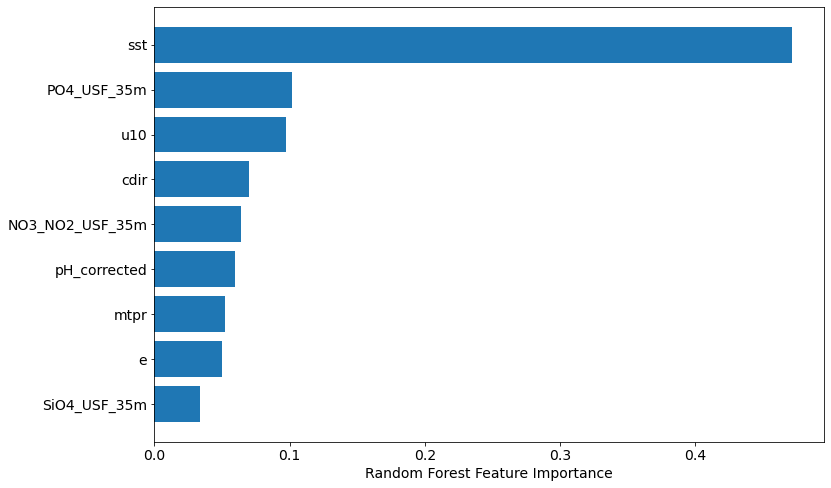

In [211]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [212]:
# permutation importance:
perm_importance = permutation_importance(rf, X_test, y_test)

Text(0.5, 0, 'Permutation Importance')

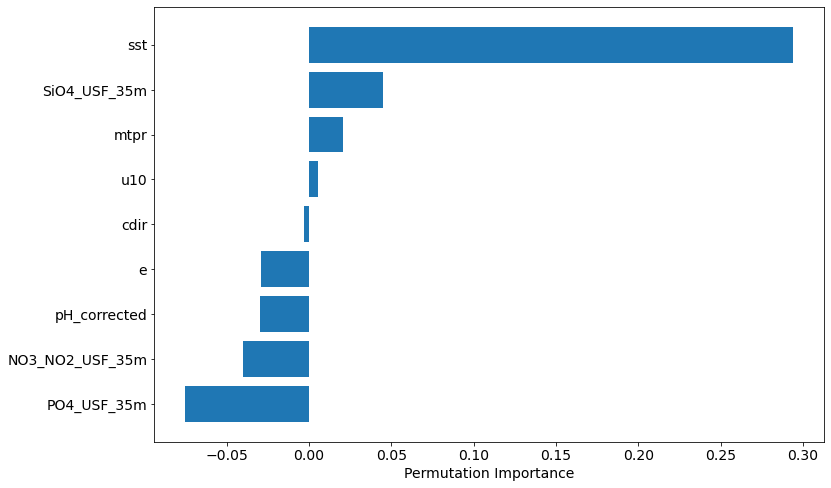

In [213]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [201]:
# SHAP feature importance:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

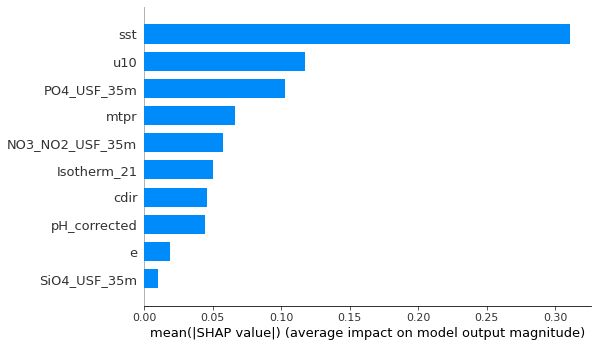

In [202]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

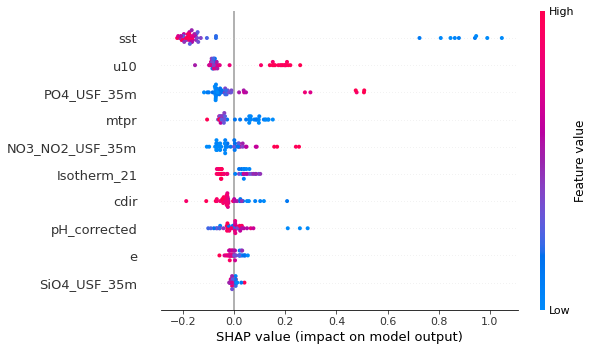

In [203]:
shap.summary_plot(shap_values, X_test)

# Stability Selection

In [133]:
from sklearn.linear_model import Lasso
#boston = load_boston()
 
#using the Boston housing data. 
#Data gets scaled automatically by sklearn's implementation
X = X
Y = y
names = X.columns
 
rlasso = Lasso(alpha=0.025)
rlasso.fit(X, Y)
 
#print("Features sorted by their score:")
#print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
#                 names), reverse=True))


Features sorted by their score:


In [145]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

clf = Pipeline([
  ('feature_selection', SelectFromModel(LinearSVC(penalty="l1"))),
  ('classification', RandomForestRegressor())
])
clf.fit(X, y)

ValueError: Unknown label type: 'continuous'